<a href="https://colab.research.google.com/github/yachika-yashu/Machine-learning/blob/main/Multiple_linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

use the historical time series data provided below to forecast natural gas prices for the next 12 months. Make sure you Convert Date Features to numerical features for Machine Learning. Consider handling different month lengths properly. Visualize Past and Forecasted Time Series. Also write code for the function that estimates a future value based on a specific date input.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [15]:
df = pd.read_csv('/content/Nat_Gas.csv', parse_dates=['Dates'])

df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df.head()

<ipython-input-15-d3756a76540d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/Nat_Gas.csv', parse_dates=['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


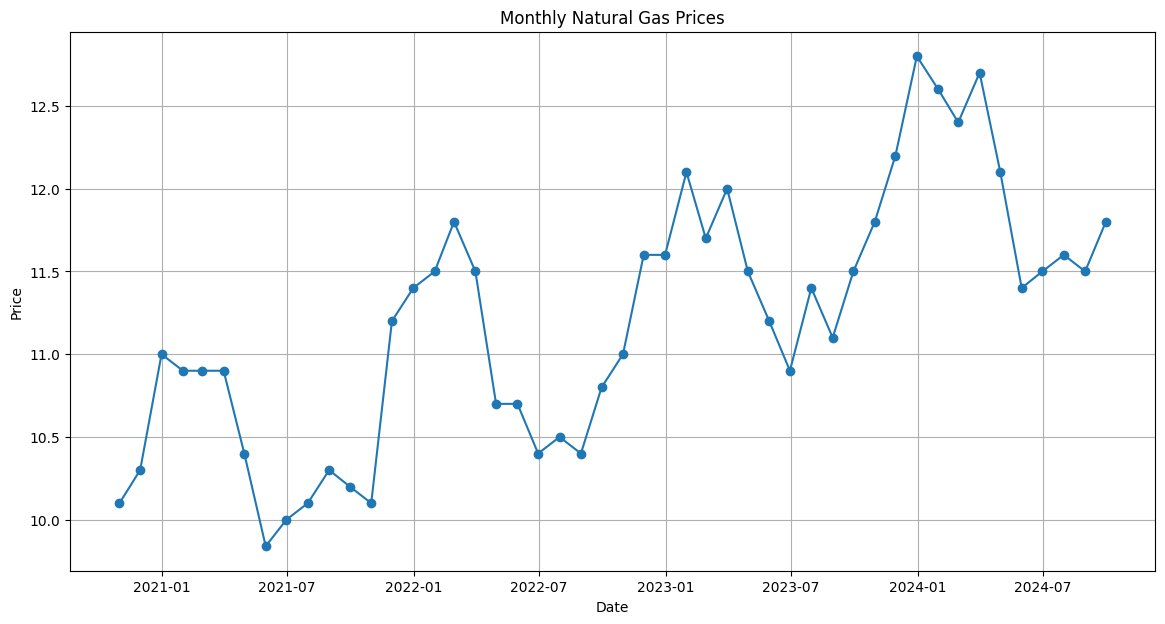

In [16]:
# Visualize the data
plt.figure(figsize=(14,7))
plt.plot(df['Dates'], df['Prices'], marker='o')
plt.title('Monthly Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [17]:

# Prepare data for linear regression model
df['Days'] = (df['Dates'] - df['Dates'].min()).dt.days #Calculates the number of days since the first date in the dataset.
X = df[['Days']] #Features for the regression model (number of days).
y = df['Prices']
# Train the linear regression model
lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

Why do we convert dates to days?

Because linear regression only works with numeric input.

Dates like "01/31/2022" are not numerical values. We need to:

Represent time as a numeric feature,

Ensure it's continuous and increasing, so the model can find patterns.

Converting to days gives us a simple numeric axis — “how much time has passed since the start?” — that models can understand and use for predictions.

In [19]:

# Generate the next 12 month-end dates
future_dates = pd.date_range(start=df['Dates'].max() + pd.offsets.MonthEnd(1), periods=12, freq='M') #Uses pd.date_range(..., freq='M') to correctly handle varying month lengths.
future_days = [(date - df['Dates'].min()).days for date in future_dates]
future_prices = lr.predict(np.array(future_days).reshape(-1, 1))


<ipython-input-19-6d00522d8924>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df['Dates'].max() + pd.offsets.MonthEnd(1), periods=12, freq='M') #Uses pd.date_range(..., freq='M') to correctly handle varying month lengths.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Above we generate the next 12 months' month-end dates.

How?



*   df['Dates'].max() This gives the latest date in your dataset.
*   + pd.offsets.MonthEnd(1)
    This adds one month-end offset to the last date, moving it to the next month-end. MonthEnd(1) means "move to the next month's end".

If df['Dates'].max() is already a month-end like 2024-09-30, this moves it to 2024-10-31.



*  pd.date_range(...)

You're creating a range of dates.

start=...: Starts at the next month-end (as calculated above).

periods=12: You want 12 future points.

freq='M': 'M' means month-end frequency.

🔄 This handles different month lengths automatically (like Feb vs March).



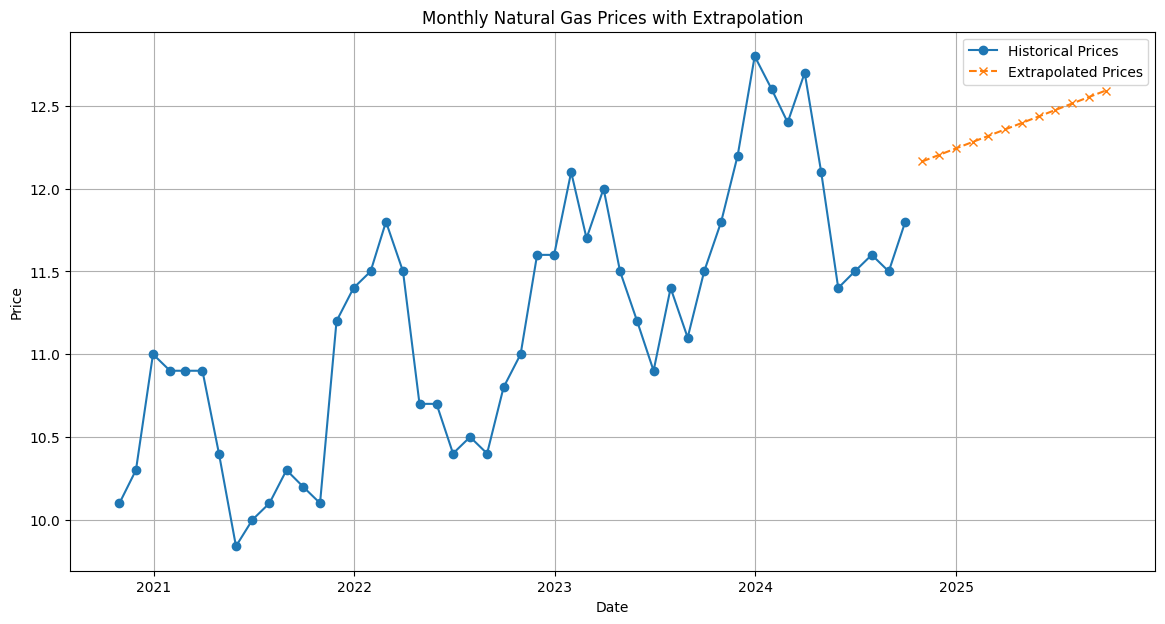

In [20]:
 #Visualize extrapolated prices
plt.figure(figsize=(14,7))
plt.plot(df['Dates'], df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_dates, future_prices, marker='x', linestyle='--', label='Extrapolated Prices')
plt.title('Monthly Natural Gas Prices with Extrapolation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Function to estimate price on a given date
def estimate_price(date_str):
    try:
        date = pd.to_datetime(date_str)
    except:
        raise ValueError("Invalid date format. Please use YYYY-MM-DD or MM/DD/YY.")

    if date < df['Dates'].min():
        raise ValueError("Date is before the dataset range.")

    days = (date - df['Dates'].min()).days
    estimated_price = lr.predict(np.array([[days]]))[0]
    return round(estimated_price, 2)

In [24]:
# Example usage of estimate_price function
example_date = '12/15/23'
estimated_price = estimate_price(example_date)
print(f"The estimated price of natural gas on {example_date} is {estimated_price:.2f}.")


The estimated price of natural gas on 12/15/23 is 11.75.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
